# [Live Coding 🦊] Que vaudra le Bitcoin en 2024 ?

Hello,

Je te propose que l'on code ensemble en direct un programme en Python 🐍 pour prédire les valeurs du Bitcoin 💰en 2024 grâce au Machine Learning (Intelligence Artificielle), en se basant sur ses précédentes valeurs.

➡️Si tu ne sais pas coder Python 🤷‍♂️: tu peux suivre le live pour interpréter les résultats avec moi 📈

➡️Si tu sais coder en Python 🧑‍💻: tu pourras suivre "step by step" la création de ce programme en le développant sur ta machine en direct et l'enrichir après ce live 🚀

Nous finirons ce live par un échange afin de débattre sur la fiabilité de cette prédiction.

PS : j'ai créé cet évènement à des fins pédagogiques et je ne serai en aucun cas tenu responsable d'éventuels achats de Bitcoins basés sur les prédictions que nous allons faire ensemble 😁.

A bientôt

Anthony 🦊
14/12/2023

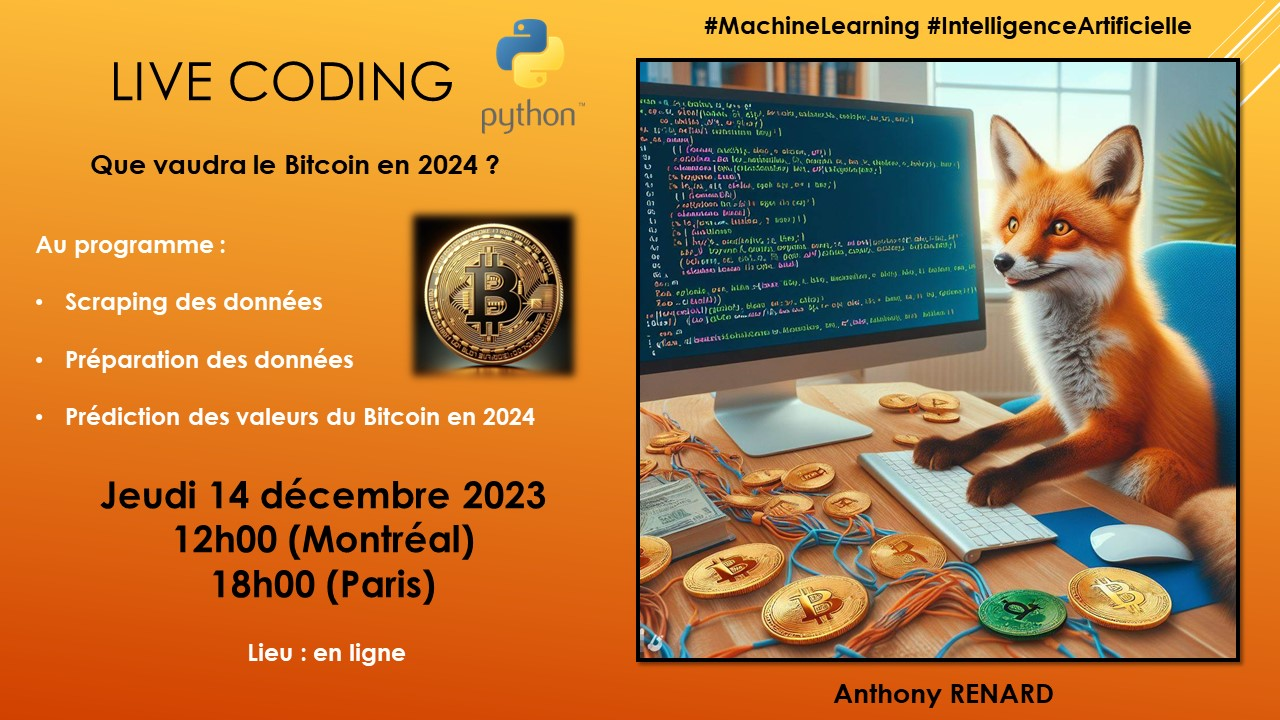

In [16]:
from IPython.display import Image

image_path = 'C:/Users/Utilisateur/TESTS/bitcoin/bitcoinlive/live_coding.JPG'

Image(filename=image_path, width=1100, height=1100)

In [17]:
#Importation des librairies utiles
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf #https://pypi.org/project/yfinance
from prophet import Prophet #https://facebook.github.io/prophet/
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly
from sklearn.model_selection import train_test_split

In [2]:
#Vérification de la version de Python
import sys
print(sys.version)


3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]


# 1. Scrapping de l'évolution de la valeur du Bitcoin en fonction du temps

In [3]:
#scapping des données :  Download market data from Yahoo! Finance's API : https://pypi.org/project/yfinance
df_BTC_EUR=yf.download("BTC-EUR",start="2014-01-01", end="2023-12-14")
df_BTC_EUR.reset_index(inplace=True) #Permet de considérer la colonne date comme une simple colonne et non plus un index
df_BTC_EUR

[*********************100%%**********************]  1 of 1 completed


Date          Open          High           Low         Close  \
0    2014-09-17    359.546204    361.468506    351.586884    355.957367   
1    2014-09-18    355.588409    355.505402    319.789459    328.539368   
2    2014-09-19    328.278503    330.936707    298.921021    307.761139   
3    2014-09-20    307.665253    329.978180    303.931244    318.758972   
4    2014-09-21    318.120514    321.504517    306.502197    310.632446   
...         ...           ...           ...           ...           ...   
3370 2023-12-09  40123.339844  41539.382812  39986.851562  40995.437500   
3371 2023-12-10  41007.894531  41176.117188  40495.136719  40586.460938   
3372 2023-12-11  40588.683594  40909.796875  40495.066406  40666.917969   
3373 2023-12-12  40678.363281  40690.398438  37380.941406  38311.312500   
3374 2023-12-13  38306.578125  38979.156250  37697.570312  38385.144531   

         Adj Close       Volume  
0       355.957367     16389166  
1       328.539368     26691849  
2       307.761139     29560103  
3       318.758972     28736826  
4       310.632446     20702625  
...            ...          ...  
3370  40995.437500  22667680509  
3371  40586.460938  16121172681  
3372  40666.917969  12076134189  
3373  38311.312500  37743607791  
3374  38385.144531  22947173736  

[3375 rows x 7 columns]

In [4]:
#Selection des 2 colonnes qui nous intéresse
df_BTC_EUR_DC = df_BTC_EUR[['Date','Close']]
df_BTC_EUR_DC

Date         Close
0    2014-09-17    355.957367
1    2014-09-18    328.539368
2    2014-09-19    307.761139
3    2014-09-20    318.758972
4    2014-09-21    310.632446
...         ...           ...
3370 2023-12-09  40995.437500
3371 2023-12-10  40586.460938
3372 2023-12-11  40666.917969
3373 2023-12-12  38311.312500
3374 2023-12-13  38385.144531

[3375 rows x 2 columns]

Text(0, 0.5, 'Valeur du Bitcoin en Euros')

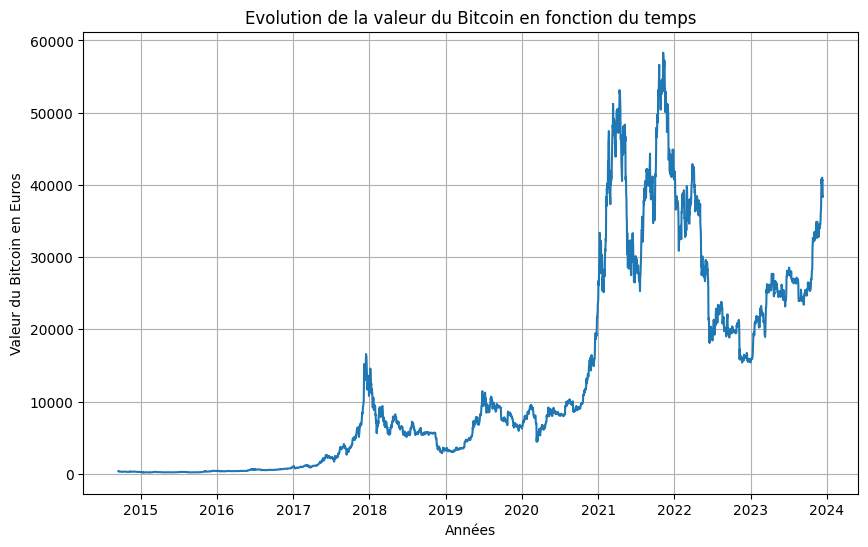

In [5]:
# Affichage du graphique des valeurs de clôture
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.grid(True)
sns.lineplot(data=df_BTC_EUR_DC, x='Date', y='Close', ax=ax)
ax.set_title('Evolution de la valeur du Bitcoin en fonction du temps')
ax.set_xlabel('Années')
ax.set_ylabel('Valeur du Bitcoin en Euros')

# 2. Prédiction de la valeur du BITCOIN dans le futur

## 2.1 Préparation des données

In [6]:
#Nommination des colonnes dans la règle exigé par le modèle Prophet
df_BTC_EUR_DC.columns=['ds', 'y']
df_BTC_EUR_DC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3375 entries, 0 to 3374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3375 non-null   datetime64[ns]
 1   y       3375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.9 KB


In [7]:
#Séparation des données en jeux d'entrainement et jeux de test\n",
df_BTC_EUR_DC_train, df_BTC_EUR_DC_test = train_test_split(df_BTC_EUR_DC, test_size=0.2, shuffle=False,  random_state=55)
#Shuffle = False car ici il ne faux pas mélanger les lignes des Dataframes car nous devons conserver la chronologie",

In [8]:
#Affichage des dataframes d'entrainement et de test
print("Fin de df_BTC_EUR_DC_train")
display(df_BTC_EUR_DC_train.tail())
print("Début de df_BTC_EUR_DC_test")
display(df_BTC_EUR_DC_test.head())
print("Ici on peut vérifier que nos 2 Dataframes se suivent bien en termes de dates")

Fin de df_BTC_EUR_DC_train


ds             y
2695 2022-02-02  32702.763672
2696 2022-02-03  32490.472656
2697 2022-02-04  36247.984375
2698 2022-02-05  36195.832031
2699 2022-02-06  37026.605469

Début de df_BTC_EUR_DC_test


ds             y
2700 2022-02-07  38316.410156
2701 2022-02-08  38630.597656
2702 2022-02-09  38821.855469
2703 2022-02-10  38176.585938
2704 2022-02-11  37360.546875

Ici on peut vérifier que nos 2 Dataframes se suivent bien en termes de dates


## 2.2 Création et entrainement du modèle

In [9]:
model_BTC_EUR = Prophet() #Chargement du modèle
model_BTC_EUR.fit(df_BTC_EUR_DC_train) #Entrainement du modèle avec le jeu d'entrainement

10:51:26 - cmdstanpy - INFO - Chain [1] start processing
10:51:26 - cmdstanpy - INFO - Chain [1] done processing


## 2.3 Prédiction

In [10]:
future = model_BTC_EUR.make_future_dataframe(periods=365*2, freq="B") # définition de la plage prédiction sur 2 ans
df_prediction=model_BTC_EUR.predict(future) #prédiction
df_prediction

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0    2014-09-17      28.790270   -6930.273590    3962.738822      28.790270   
1    2014-09-18      29.478406   -6841.816468    4262.431562      29.478406   
2    2014-09-19      30.166541   -6991.795778    4213.305577      30.166541   
3    2014-09-20      30.854677   -7002.856221    3687.913079      30.854677   
4    2014-09-21      31.542813   -6850.209310    4210.216446      31.542813   
...         ...            ...            ...            ...            ...   
3425 2024-11-18  123390.013579  108582.195443  138553.111313  108584.841492   
3426 2024-11-19  123460.582733  108006.119650  139340.493969  108637.642515   
3427 2024-11-20  123531.151887  107696.929270  139132.213395  108690.443539   
3428 2024-11-21  123601.721041  107996.244796  139265.618619  108743.244563   
3429 2024-11-22  123672.290195  108090.295451  139199.105128  108796.045587   

        trend_upper  additive_terms  additive_terms_lower  \
0         28.790270    -1320.638089          -1320.638089   
1         29.478406    -1394.148267          -1394.148267   
2         30.166541    -1411.261539          -1411.261539   
3         30.854677    -1431.983722          -1431.983722   
4         31.542813    -1462.815816          -1462.815816   
...             ...             ...                   ...   
3425  137719.261553      169.685027            169.685027   
3426  137833.901826      109.190000            109.190000   
3427  137926.187832      102.403698            102.403698   
3428  138014.126713       35.099102             35.099102   
3429  138102.544075       17.151714             17.151714   

      additive_terms_upper     weekly  weekly_lower  weekly_upper  \
0             -1320.638089  14.859553     14.859553     14.859553   
1             -1394.148267 -21.445608    -21.445608    -21.445608   
2             -1411.261539  -5.925817     -5.925817     -5.925817   
3             -1431.983722   1.031814      1.031814      1.031814   
4             -1462.815816  -7.437489     -7.437489     -7.437489   
...                    ...        ...           ...           ...   
3425            169.685027  26.147086     26.147086     26.147086   
3426            109.190000  -7.229538     -7.229538     -7.229538   
3427            102.403698  14.859553     14.859553     14.859553   
3428             35.099102 -21.445608    -21.445608    -21.445608   
3429             17.151714  -5.925817     -5.925817     -5.925817   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0    -1335.497642  -1335.497642  -1335.497642                   0.0   
1    -1372.702659  -1372.702659  -1372.702659                   0.0   
2    -1405.335722  -1405.335722  -1405.335722                   0.0   
3    -1433.015536  -1433.015536  -1433.015536                   0.0   
4    -1455.378327  -1455.378327  -1455.378327                   0.0   
...           ...           ...           ...                   ...   
3425   143.537941    143.537941    143.537941                   0.0   
3426   116.419538    116.419538    116.419538                   0.0   
3427    87.544145     87.544145     87.544145                   0.0   
3428    56.544710     56.544710     56.544710                   0.0   
3429    23.077531     23.077531     23.077531                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                            0.0                         0.0   -1291.847819  
1                            0.0                         0.0   -1364.669861  
2                            0.0                         0.0   -1381.094997  
3                            0.0                         0.0   -1401.129045  
4                            0.0                         0.0   -1431.273003  
...                          ...                         ...            ...  
3425                         0.0                         0.0  123559.698606  
3426                     

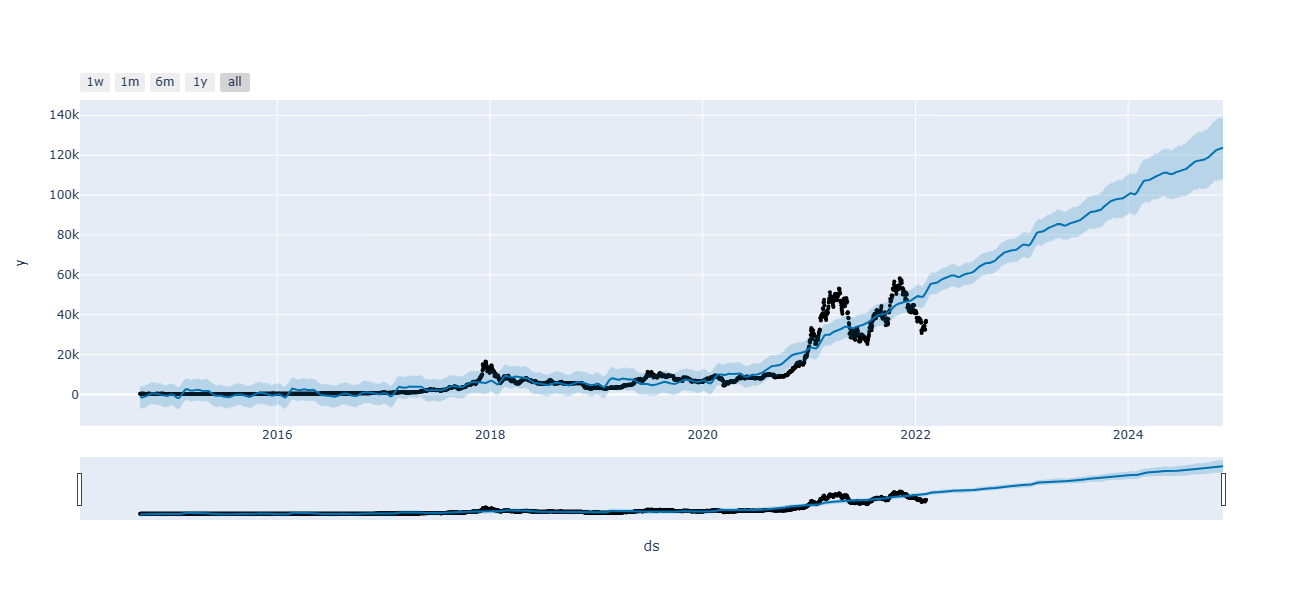

In [11]:
# Affichage des data d'entrainement en noir et de prédiction en bleu
plot_plotly(model_BTC_EUR, df_prediction)

[[<matplotlib.lines.Line2D at 0x14009f91ac0>],

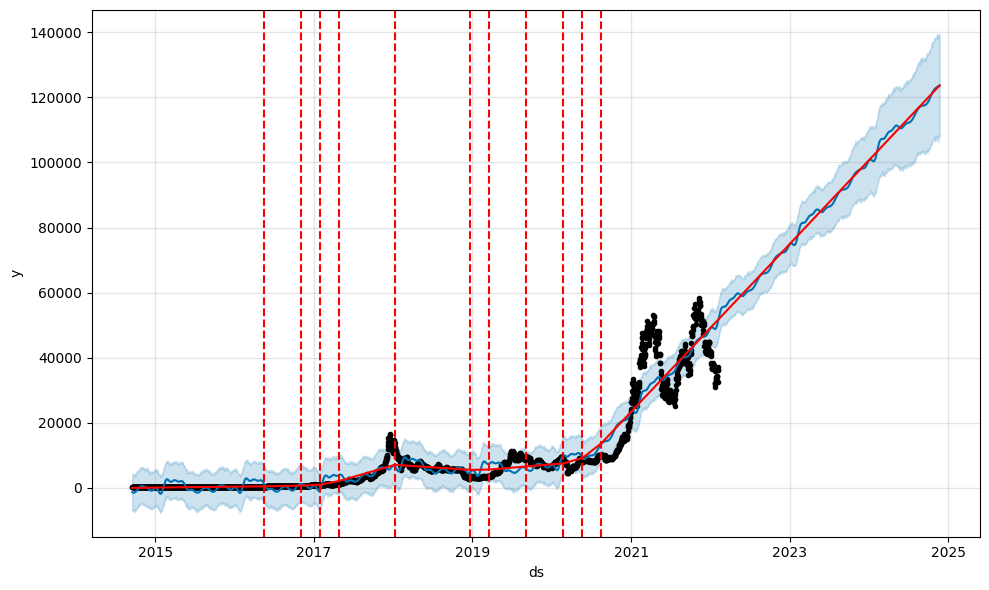

In [12]:
#Mise en valeur des changepoints (changement de direction de tendances)

from prophet.plot import add_changepoints_to_plot
figure=model_BTC_EUR.plot(df_prediction)
add_changepoints_to_plot(figure.gca(), model_BTC_EUR,df_prediction)

# FIN  [Live Coding 🦊] Que vaudra le Bitcoin en 2024 ?